In [1]:
#include <map>
#include "ROOT/RDataFrame.hxx"
using namespace std;

In [2]:
string eos_path = "/eos/cms/store/user/lzygala/HVV/Selection_TTrees_v2/AllYears/BDT_Settings_01232023_v2/";
string years[] = {"16APV", "16", "17", "18"};


In [3]:

std::vector<std::string> feats_s = {"CandidateVBF_Jet_invMass",
                "CandidateVBF_Jet_etaSep",
                "CandidateVBF_Lead_Jet_pt",
                "CandidateVBF_Trail_Jet_pt",
                "CandidateHiggs_FatJet_pt",
                "CandidateHiggs_FatJet_eta",
                "CandidateHiggs_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_pt",
                "CandidateW_SemiLeptonic_FatJet_eta",
                "CandidateW_SemiLeptonic_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_flavor_flt",
                "Candidate_SemiLeptonic_Lepton_pt",
                "Candidate_SemiLeptonic_Lepton_eta",
                "MET_pt",
                "Candidate_SemiLeptonic_ST",
                "Candidate_SemiLeptonic_Lepton_type_flt"};

std::vector<std::string> feats_l = {"CandidateVBF_Jet_invMass",
                    "CandidateVBF_Jet_etaSep",
                    "CandidateVBF_Lead_Jet_pt",
                    "CandidateVBF_Trail_Jet_pt",
                    "CandidateHiggs_FatJet_pt",
                    "CandidateHiggs_FatJet_eta",
                    "CandidateHiggs_FatJet_msoftdrop",
                    //"CandidateHiggs_FatJet_particlenetScore",
                    "Candidate_Leptonic_Lead_Lepton_pt",
                    "Candidate_Leptonic_Trail_Lepton_pt",
                    "Candidate_Leptonic_Lead_Lepton_eta",
                    "Candidate_Leptonic_Trail_Lepton_eta",
                    "Candidate_Leptonic_Lepton_InvMass",
                    "MET_pt",
                    "Candidate_Leptonic_ST",
                    "Lep_dR",
                    "Lep_dEta",
                    "Candidate_Leptonic_MT",
                    "EventType_Leptonic_flt"};

In [4]:


TMVA::Experimental::RBDT<> bdt_1L_18("bdt_1L_18", "bdt_1L_18.root");
TMVA::Experimental::RBDT<> bdt_1L_17("bdt_1L_17", "bdt_1L_17.root");
TMVA::Experimental::RBDT<> bdt_1L_16("bdt_1L_16", "bdt_1L_16.root");
TMVA::Experimental::RBDT<> bdt_1L_16APV("bdt_1L_16APV", "bdt_1L_16APV.root");

TMVA::Experimental::RBDT<> bdt_2L_18("bdt_2L_18", "bdt_2L_18.root");
TMVA::Experimental::RBDT<> bdt_2L_17("bdt_2L_17", "bdt_2L_17.root");
TMVA::Experimental::RBDT<> bdt_2L_16("bdt_2L_16", "bdt_2L_16.root");
TMVA::Experimental::RBDT<> bdt_2L_16APV("bdt_2L_16APV", "bdt_2L_16APV.root");


In [5]:
ROOT::RDataFrame df_1L_18("Events_semileptonic", {(eos_path+"SIG_WWH_WZH_18.root").c_str(), (eos_path+"BKG_18.root").c_str()});
ROOT::RDataFrame df_1L_17("Events_semileptonic", {(eos_path+"SIG_WWH_WZH_17.root").c_str(), (eos_path+"BKG_17.root").c_str()});
ROOT::RDataFrame df_1L_16("Events_semileptonic", {(eos_path+"SIG_WWH_WZH_16.root").c_str(), (eos_path+"BKG_16.root").c_str()});
ROOT::RDataFrame df_1L_16APV("Events_semileptonic", {(eos_path+"SIG_WWH_WZH_16APV.root").c_str(), (eos_path+"BKG_16APV.root").c_str()});

ROOT::RDataFrame df_2L_18("Events_leptonic", {(eos_path+"SIG_WWH_WZH_18.root").c_str(), (eos_path+"BKG_18.root").c_str()});
ROOT::RDataFrame df_2L_17("Events_leptonic", {(eos_path+"SIG_WWH_WZH_17.root").c_str(), (eos_path+"BKG_17.root").c_str()});
ROOT::RDataFrame df_2L_16("Events_leptonic", {(eos_path+"SIG_WWH_WZH_16.root").c_str(), (eos_path+"BKG_16.root").c_str()});
ROOT::RDataFrame df_2L_16APV("Events_leptonic", {(eos_path+"SIG_WWH_WZH_16APV.root").c_str(), (eos_path+"BKG_16APV.root").c_str()});


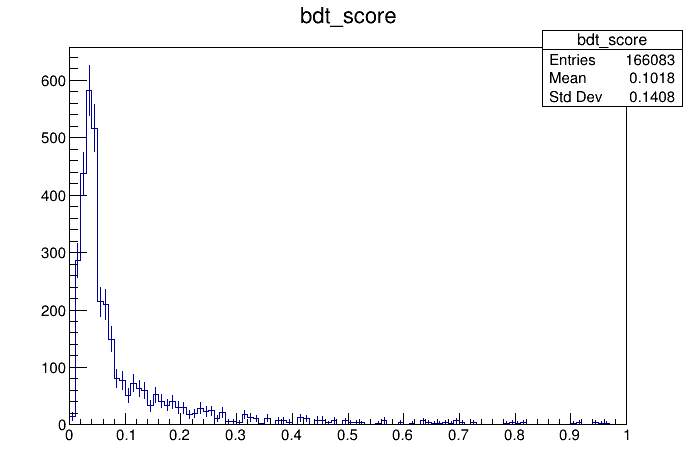

In [6]:
auto df_1L_18_mid = df_1L_18.Define("CandidateW_SemiLeptonic_FatJet_flavor_flt", "static_cast<float>(CandidateW_SemiLeptonic_FatJet_flavor)")
            .Define("Candidate_SemiLeptonic_Lepton_type_flt", "static_cast<float>(Candidate_SemiLeptonic_Lepton_type)");

auto df_1L_18_out = df_1L_18_mid.Define("bdt_score",
               TMVA::Experimental::Compute<16, float>(bdt_1L_18),
               {"CandidateVBF_Jet_invMass",
                "CandidateVBF_Jet_etaSep",
                "CandidateVBF_Lead_Jet_pt",
                "CandidateVBF_Trail_Jet_pt",
                "CandidateHiggs_FatJet_pt",
                "CandidateHiggs_FatJet_eta",
                "CandidateHiggs_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_pt",
                "CandidateW_SemiLeptonic_FatJet_eta",
                "CandidateW_SemiLeptonic_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_flavor_flt",
                "Candidate_SemiLeptonic_Lepton_pt",
                "Candidate_SemiLeptonic_Lepton_eta",
                "MET_pt",
                "Candidate_SemiLeptonic_ST",
                "Candidate_SemiLeptonic_Lepton_type_flt"});

TCanvas *c1 = new TCanvas();

auto hist_6 = df_1L_18_out.Histo1D({"bdt_score","bdt_score",100,0,1},"bdt_score","Xsec_genWeight");
hist_6->Draw("h");
c1->Draw();


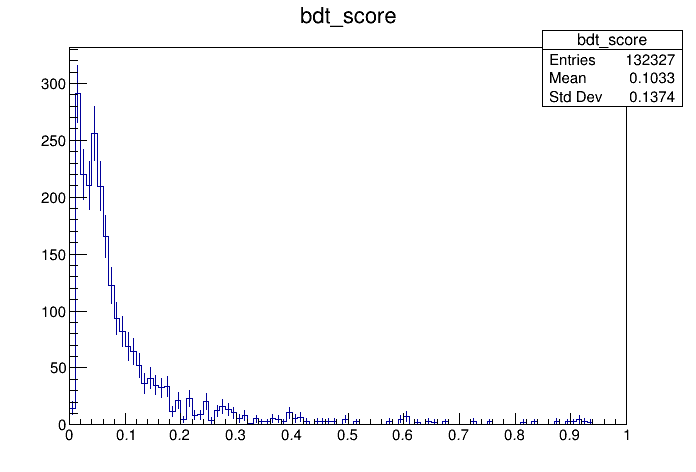

In [7]:
auto df_1L_17_mid = df_1L_17.Define("CandidateW_SemiLeptonic_FatJet_flavor_flt", "static_cast<float>(CandidateW_SemiLeptonic_FatJet_flavor)")
            .Define("Candidate_SemiLeptonic_Lepton_type_flt", "static_cast<float>(Candidate_SemiLeptonic_Lepton_type)");

auto df_1L_17_out = df_1L_17_mid.Define("bdt_score",
               TMVA::Experimental::Compute<16, float>(bdt_1L_17),
               {"CandidateVBF_Jet_invMass",
                "CandidateVBF_Jet_etaSep",
                "CandidateVBF_Lead_Jet_pt",
                "CandidateVBF_Trail_Jet_pt",
                "CandidateHiggs_FatJet_pt",
                "CandidateHiggs_FatJet_eta",
                "CandidateHiggs_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_pt",
                "CandidateW_SemiLeptonic_FatJet_eta",
                "CandidateW_SemiLeptonic_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_flavor_flt",
                "Candidate_SemiLeptonic_Lepton_pt",
                "Candidate_SemiLeptonic_Lepton_eta",
                "MET_pt",
                "Candidate_SemiLeptonic_ST",
                "Candidate_SemiLeptonic_Lepton_type_flt"});

TCanvas *c1 = new TCanvas();

auto hist_6 = df_1L_17_out.Histo1D({"bdt_score","bdt_score",100,0,1},"bdt_score","Xsec_genWeight");
hist_6->Draw("h");
c1->Draw();

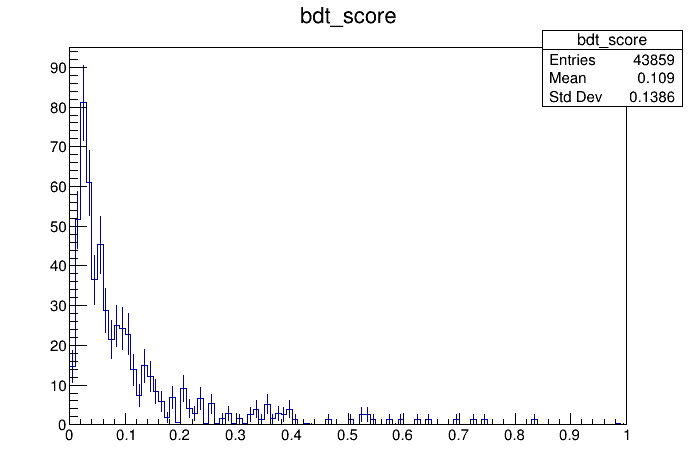

In [8]:
auto df_1L_16_mid = df_1L_16.Define("CandidateW_SemiLeptonic_FatJet_flavor_flt", "static_cast<float>(CandidateW_SemiLeptonic_FatJet_flavor)")
            .Define("Candidate_SemiLeptonic_Lepton_type_flt", "static_cast<float>(Candidate_SemiLeptonic_Lepton_type)");

auto df_1L_16_out = df_1L_16_mid.Define("bdt_score",
               TMVA::Experimental::Compute<16, float>(bdt_1L_16),
               {"CandidateVBF_Jet_invMass",
                "CandidateVBF_Jet_etaSep",
                "CandidateVBF_Lead_Jet_pt",
                "CandidateVBF_Trail_Jet_pt",
                "CandidateHiggs_FatJet_pt",
                "CandidateHiggs_FatJet_eta",
                "CandidateHiggs_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_pt",
                "CandidateW_SemiLeptonic_FatJet_eta",
                "CandidateW_SemiLeptonic_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_flavor_flt",
                "Candidate_SemiLeptonic_Lepton_pt",
                "Candidate_SemiLeptonic_Lepton_eta",
                "MET_pt",
                "Candidate_SemiLeptonic_ST",
                "Candidate_SemiLeptonic_Lepton_type_flt"});

TCanvas *c1 = new TCanvas();

auto hist_6 = df_1L_16_out.Histo1D({"bdt_score","bdt_score",100,0,1},"bdt_score","Xsec_genWeight");
hist_6->Draw("h");
c1->Draw();

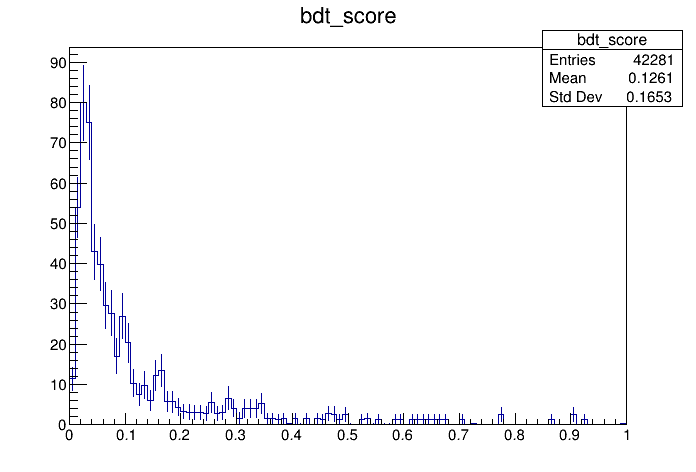

In [9]:
auto df_1L_16APV_mid = df_1L_16APV.Define("CandidateW_SemiLeptonic_FatJet_flavor_flt", "static_cast<float>(CandidateW_SemiLeptonic_FatJet_flavor)")
            .Define("Candidate_SemiLeptonic_Lepton_type_flt", "static_cast<float>(Candidate_SemiLeptonic_Lepton_type)");

auto df_1L_16APV_out = df_1L_16APV_mid.Define("bdt_score",
               TMVA::Experimental::Compute<16, float>(bdt_1L_16APV),
               {"CandidateVBF_Jet_invMass",
                "CandidateVBF_Jet_etaSep",
                "CandidateVBF_Lead_Jet_pt",
                "CandidateVBF_Trail_Jet_pt",
                "CandidateHiggs_FatJet_pt",
                "CandidateHiggs_FatJet_eta",
                "CandidateHiggs_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_pt",
                "CandidateW_SemiLeptonic_FatJet_eta",
                "CandidateW_SemiLeptonic_FatJet_msoftdrop",
                "CandidateW_SemiLeptonic_FatJet_flavor_flt",
                "Candidate_SemiLeptonic_Lepton_pt",
                "Candidate_SemiLeptonic_Lepton_eta",
                "MET_pt",
                "Candidate_SemiLeptonic_ST",
                "Candidate_SemiLeptonic_Lepton_type_flt"});

TCanvas *c1 = new TCanvas();

auto hist_6 = df_1L_16APV_out.Histo1D({"bdt_score","bdt_score",100,0,1},"bdt_score","Xsec_genWeight");
hist_6->Draw("h");
c1->Draw();

In [10]:
auto dPhi = [](float x, float y) { float z = fabs(x-y); if(z>3.14159) z = z - (2*3.14159); return z; };


In [11]:

template <typename T>
auto Filter2L(T &df_in){
    auto df2 = df_in.Define("EventType_Leptonic_flt", "static_cast<float>(EventType_Leptonic)")
            .Define("Lep_dPhi", dPhi, {"Candidate_Leptonic_Lead_Lepton_phi","Candidate_Leptonic_Trail_Lepton_phi"})
            .Define("Lep_dEta", "fabs(Candidate_Leptonic_Lead_Lepton_eta - Candidate_Leptonic_Trail_Lepton_eta)");
    auto df3 = df2.Define("Lep_dR", "static_cast<float>(sqrt(pow(Lep_dPhi,2)+pow(Lep_dEta,2)))");
    
    return df3;
}

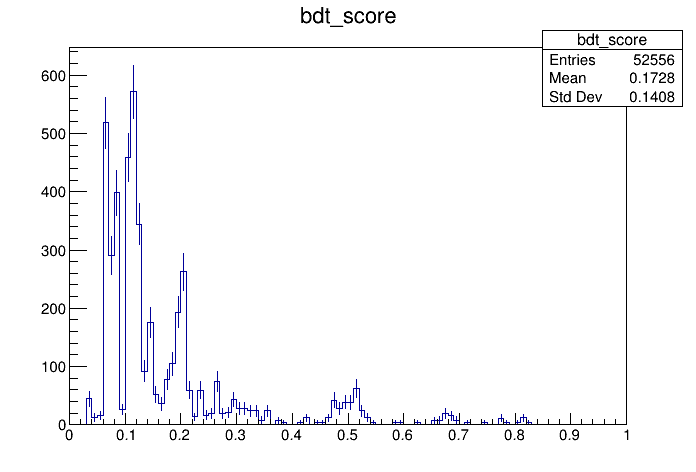

In [12]:
auto df_2L_18_mid = Filter2L(df_2L_18);

auto df_2L_18_out = df_2L_18_mid.Define("bdt_score",
               TMVA::Experimental::Compute<18, float>(bdt_2L_18), 
    {"CandidateVBF_Jet_invMass",
                    "CandidateVBF_Jet_etaSep",
                    "CandidateVBF_Lead_Jet_pt",
                    "CandidateVBF_Trail_Jet_pt",
                    "CandidateHiggs_FatJet_pt",
                    "CandidateHiggs_FatJet_eta",
                    "CandidateHiggs_FatJet_msoftdrop",
                    //"CandidateHiggs_FatJet_particlenetScore",
                    "Candidate_Leptonic_Lead_Lepton_pt",
                    "Candidate_Leptonic_Trail_Lepton_pt",
                    "Candidate_Leptonic_Lead_Lepton_eta",
                    "Candidate_Leptonic_Trail_Lepton_eta",
                    "Candidate_Leptonic_Lepton_InvMass",
                    "MET_pt",
                    "Candidate_Leptonic_ST",
                    "Lep_dR",
                    "Lep_dEta",
                    "Candidate_Leptonic_MT",
                    "EventType_Leptonic_flt"}
               );

auto hist_6 = df_2L_18_out.Histo1D({"bdt_score","bdt_score",100,0,1},"bdt_score","Xsec_genWeight");
hist_6->Draw("h");
c1->Draw();

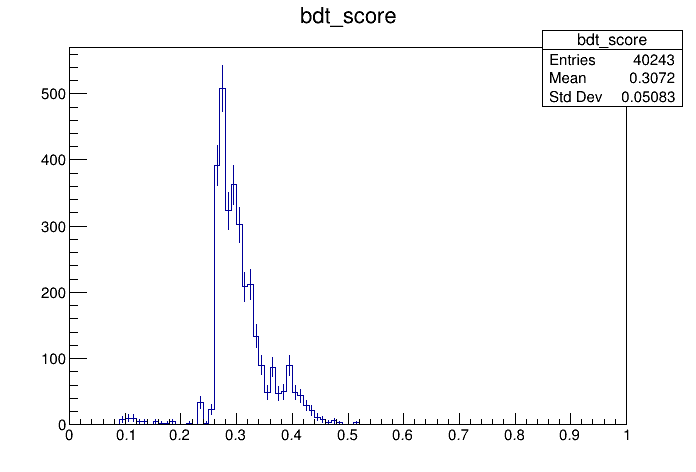

In [13]:
auto df_2L_17_mid = Filter2L(df_2L_17);

auto df_2L_17_out = df_2L_17_mid.Define("bdt_score",
               TMVA::Experimental::Compute<18, float>(bdt_2L_17), 
    {"CandidateVBF_Jet_invMass",
                    "CandidateVBF_Jet_etaSep",
                    "CandidateVBF_Lead_Jet_pt",
                    "CandidateVBF_Trail_Jet_pt",
                    "CandidateHiggs_FatJet_pt",
                    "CandidateHiggs_FatJet_eta",
                    "CandidateHiggs_FatJet_msoftdrop",
                    //"CandidateHiggs_FatJet_particlenetScore",
                    "Candidate_Leptonic_Lead_Lepton_pt",
                    "Candidate_Leptonic_Trail_Lepton_pt",
                    "Candidate_Leptonic_Lead_Lepton_eta",
                    "Candidate_Leptonic_Trail_Lepton_eta",
                    "Candidate_Leptonic_Lepton_InvMass",
                    "MET_pt",
                    "Candidate_Leptonic_ST",
                    "Lep_dR",
                    "Lep_dEta",
                    "Candidate_Leptonic_MT",
                    "EventType_Leptonic_flt"}
               );

auto hist_6 = df_2L_17_out.Histo1D({"bdt_score","bdt_score",100,0,1},"bdt_score","Xsec_genWeight");
hist_6->Draw("h");
c1->Draw();

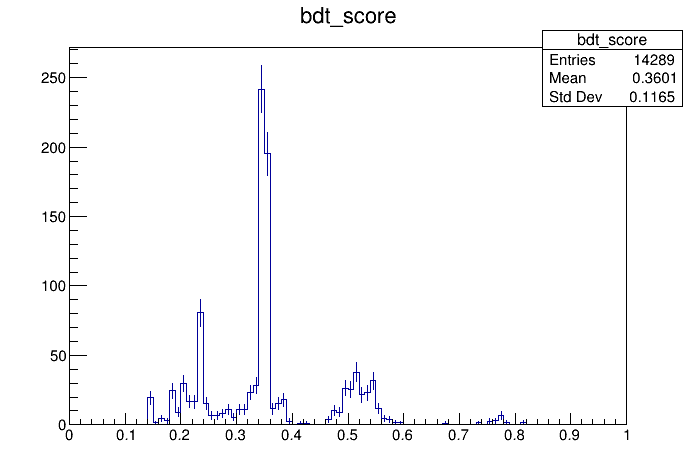

In [14]:
auto df_2L_16_mid = Filter2L(df_2L_16);

auto df_2L_16_out = df_2L_16_mid.Define("bdt_score",
               TMVA::Experimental::Compute<18, float>(bdt_2L_16), 
    {"CandidateVBF_Jet_invMass",
                    "CandidateVBF_Jet_etaSep",
                    "CandidateVBF_Lead_Jet_pt",
                    "CandidateVBF_Trail_Jet_pt",
                    "CandidateHiggs_FatJet_pt",
                    "CandidateHiggs_FatJet_eta",
                    "CandidateHiggs_FatJet_msoftdrop",
                    //"CandidateHiggs_FatJet_particlenetScore",
                    "Candidate_Leptonic_Lead_Lepton_pt",
                    "Candidate_Leptonic_Trail_Lepton_pt",
                    "Candidate_Leptonic_Lead_Lepton_eta",
                    "Candidate_Leptonic_Trail_Lepton_eta",
                    "Candidate_Leptonic_Lepton_InvMass",
                    "MET_pt",
                    "Candidate_Leptonic_ST",
                    "Lep_dR",
                    "Lep_dEta",
                    "Candidate_Leptonic_MT",
                    "EventType_Leptonic_flt"}
               );

auto hist_6 = df_2L_16_out.Histo1D({"bdt_score","bdt_score",100,0,1},"bdt_score","Xsec_genWeight");
hist_6->Draw("h");
c1->Draw();

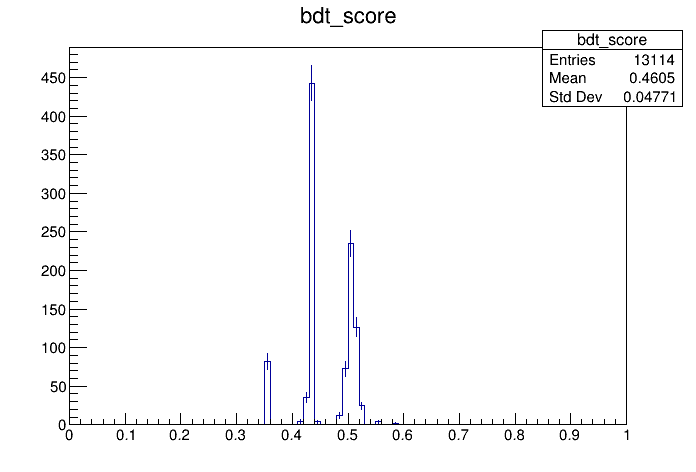

In [15]:
auto df_2L_16APV_mid = Filter2L(df_2L_16APV);

auto df_2L_16APV_out = df_2L_16APV_mid.Define("bdt_score",
               TMVA::Experimental::Compute<18, float>(bdt_2L_16APV), 
    {"CandidateVBF_Jet_invMass",
                    "CandidateVBF_Jet_etaSep",
                    "CandidateVBF_Lead_Jet_pt",
                    "CandidateVBF_Trail_Jet_pt",
                    "CandidateHiggs_FatJet_pt",
                    "CandidateHiggs_FatJet_eta",
                    "CandidateHiggs_FatJet_msoftdrop",
                    //"CandidateHiggs_FatJet_particlenetScore",
                    "Candidate_Leptonic_Lead_Lepton_pt",
                    "Candidate_Leptonic_Trail_Lepton_pt",
                    "Candidate_Leptonic_Lead_Lepton_eta",
                    "Candidate_Leptonic_Trail_Lepton_eta",
                    "Candidate_Leptonic_Lepton_InvMass",
                    "MET_pt",
                    "Candidate_Leptonic_ST",
                    "Lep_dR",
                    "Lep_dEta",
                    "Candidate_Leptonic_MT",
                    "EventType_Leptonic_flt"}
               );

auto hist_6 = df_2L_16APV_out.Histo1D({"bdt_score","bdt_score",100,0,1},"bdt_score","Xsec_genWeight");
hist_6->Draw("h");
c1->Draw();

In [16]:
ROOT::RDF::RSnapshotOptions opts1;
opts1.fMode = "update";

df_2L_18_out.Snapshot("Events_leptonic", (eos_path+"MC_BDT_18.root").c_str());
df_1L_18_out.Snapshot("Events_semileptonic", (eos_path+"MC_BDT_18.root").c_str(),df_1L_18_out.GetColumnNames(), opts1);

df_2L_17_out.Snapshot("Events_leptonic", (eos_path+"MC_BDT_17.root").c_str());
df_1L_17_out.Snapshot("Events_semileptonic", (eos_path+"MC_BDT_17.root").c_str(),df_1L_17_out.GetColumnNames(), opts1);

df_2L_16_out.Snapshot("Events_leptonic", (eos_path+"MC_BDT_16.root").c_str());
df_1L_16_out.Snapshot("Events_semileptonic", (eos_path+"MC_BDT_16.root").c_str(),df_1L_16_out.GetColumnNames(), opts1);

df_2L_16APV_out.Snapshot("Events_leptonic", (eos_path+"MC_BDT_16APV.root").c_str());
df_1L_16APV_out.Snapshot("Events_semileptonic", (eos_path+"MC_BDT_16APV.root").c_str(),df_1L_16APV_out.GetColumnNames(), opts1);
